<h1 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
:پروژه ی چهارم
</font>
</h1>
<h1 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
کدگذاری عکس
</font>
</h1>
<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=4 color="orange">
  عرشیا ربیعی 
    
</font> 
</p>
<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=4 color="orange">
۶۱۰۳۹۸۱۲۵ 
    
</font> 
</p>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg

In [2]:
#constants
INFINITY = 1e9
TIME_INTERVAL = 1000

In [3]:
def rgb2gray(rgb):
    #converts rgb image into gray image
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.144])

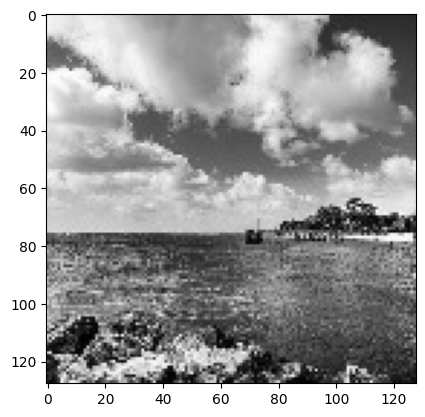

In [4]:
img_rgb = mpimg.imread('view1.jpg')
img_gray = rgb2gray(img_rgb)
img_gray = img_gray.astype(int)
plt.imshow(img_gray, cmap='gray');

In [5]:
img_gray

array([[239, 236, 237, ...,  45,  45,  45],
       [245, 243, 241, ...,  45,  45,  45],
       [245, 244, 240, ...,  46,  46,  46],
       ...,
       [ 13,  51,  27, ...,  15,  36,  39],
       [ 43,  52,   8, ...,  54,  15,  14],
       [ 31,   2,  12, ...,  28,  22,  17]])

In [6]:
img_normalized = img_gray / 255.0
tmp = img_normalized*1000
img_normalized = tmp.astype(int) / 1000.0
img_normalized

array([[0.937, 0.925, 0.929, ..., 0.176, 0.176, 0.176],
       [0.96 , 0.952, 0.945, ..., 0.176, 0.176, 0.176],
       [0.96 , 0.956, 0.941, ..., 0.18 , 0.18 , 0.18 ],
       ...,
       [0.05 , 0.2  , 0.105, ..., 0.058, 0.141, 0.152],
       [0.168, 0.203, 0.031, ..., 0.211, 0.058, 0.054],
       [0.121, 0.007, 0.047, ..., 0.109, 0.086, 0.066]])

In [22]:
img_copy = img_normalized.copy()
ttfs = []
i = 0
ttfs.append(np.zeros((img_normalized.shape[0] , img_normalized.shape[1])))
while img_copy.max() != -INFINITY:
    tmp_max = img_copy.max()
    flat_max_index = img_copy.argmax()
    j = flat_max_index // img_copy.shape[1]
    k = flat_max_index % img_copy.shape[0]
    ttfs[i][j , k] = 1
    img_copy[j,k] = -INFINITY
    if tmp_max != img_copy.max():
        ttfs.append(np.zeros((img_copy.shape[0] , img_copy.shape[1])))
        i += 1
ttfs = np.array(ttfs)
ttfs

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [8]:
time_to_first_spike = TIME_INTERVAL - (tmp * TIME_INTERVAL)
time_to_first_spike.shape
time_to_first_spike.reshape(1,128*128)

array([[-936254.90196078, -924490.19607843, -928411.76470588, ...,
        -108803.92156863,  -85274.50980392,  -65666.66666667]])

In [14]:
def scatter_array(ttfs):
    ttfs_reshape = ttfs.reshape(ttfs.shape[0] , ttfs.shape[1] * ttfs.shape[2])
    x = []
    y = []
    for i in range(ttfs_reshape.shape[0]):
        for j in range(ttfs_reshape.shape[1]):
            if ttfs_reshape[i , j] == 1:
                x.append(i)
                y.append(j)
    return x , y

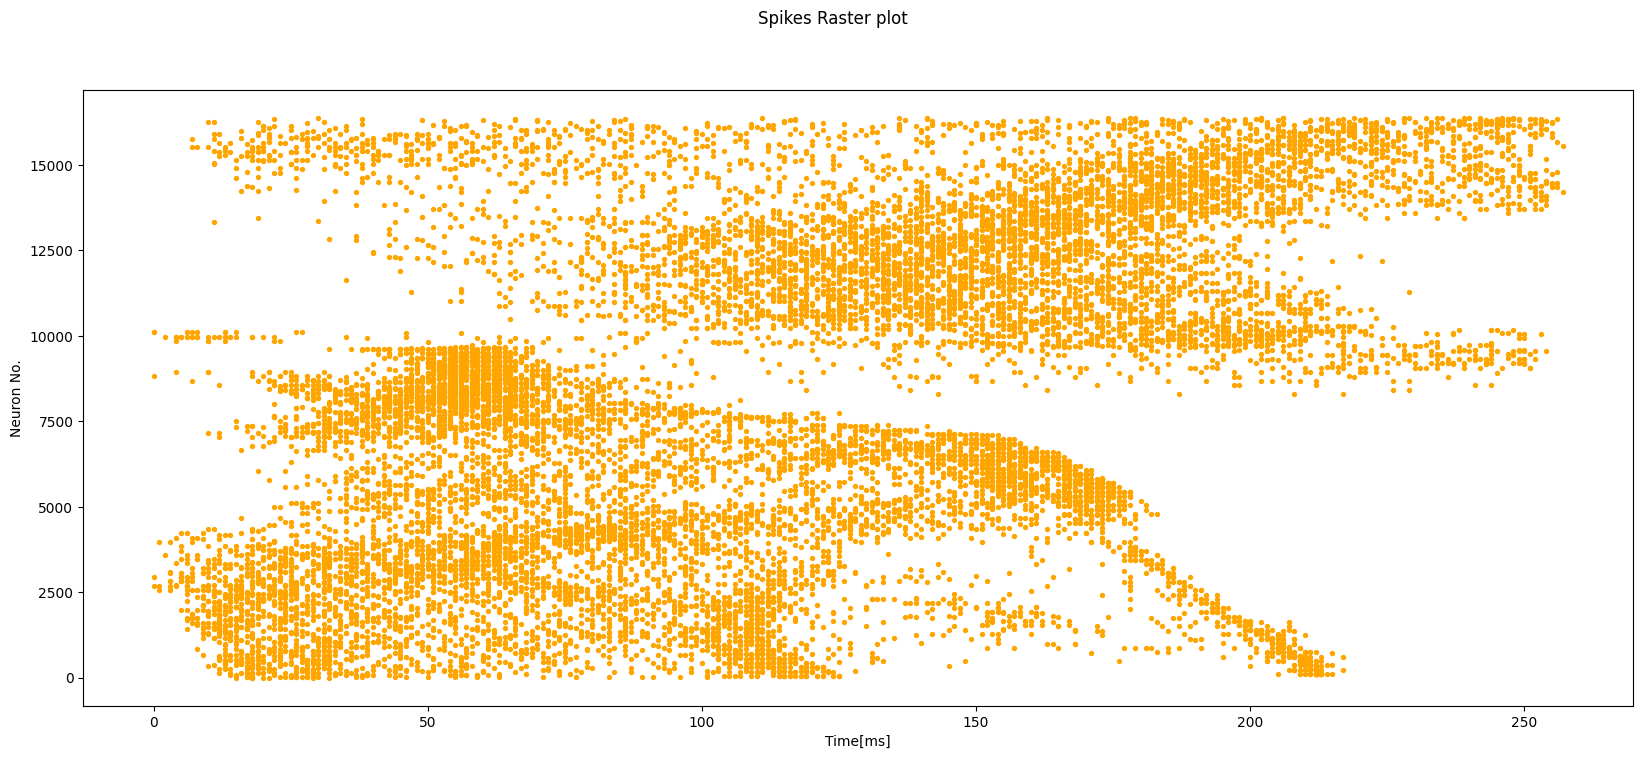

In [21]:
x , y = scatter_array(ttfs)
fig , ax = plt.subplots(1, figsize=(20, 8))
ax.scatter(x , y , s = 8 , color = 'orange')
fig.suptitle('Spikes Raster plot')
ax.set_xlabel('Time[ms]')
ax.set_ylabel('Neuron No.');